<a href="https://colab.research.google.com/github/alirezash97/Machine-Learning-Course/blob/main/Final_Project/RANZCR_fine_tune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # # # trainset
# !wget 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/23870/1781260/compressed/train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1612356291&Signature=Y0prr2JieE4gY4AM9EwN3MiMCxiaLjN2t5v6pD%2Fn08VSNiJWS2iNK%2FQAaQOeRAnH578jfJmQA8hdCRgLL6yz2NUuXRz3Vey0DlcexHiEQLn5eqUeDlFx9Z76zxf6KNd%2BLxxwofJzbJrwI2OMoC2tb26jlASakwqFUaX14f5U9pJ2Ct9Nw6%2Bf515mtCUtmX1qroNRLXjWuUvFRT%2FmZQKj54raaqr2%2BhTYSYYEB8tuEDAi11p9U6tniCKX%2B%2BEbV%2B4RLCGZQRjtlt5%2FfadwcVLbSpcBp%2BrNaMZEOz2A8jwJNpmWXHemo%2FARNnobvn7WIKvSVHDrZ%2FZ61gbEWVaOk0xz5w%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.zip'

# # # train_tfrecords
# # # !wget 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/23870/1781260/compressed/train_tfrecords.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1611835011&Signature=OBxBwfMr9c0gB7Qmiiv9lGIHSqsT2ocsodWh1H56xb%2FYMBjLkiPKxiDXMBPnvOnaUGhMmKTmlpK06O8721DFO1hCNrq9757gZrxaVpm4400ABhzZ86NgLyLfC7Zse6GUlByeDrdd2Dk6KwI%2BjHFPg4TFFov3DW13I2%2FKw9h22tNbssdkfTA7OZgll1EW9Ynh6g%2F2ULQrmTtjkfdLbObPyniLEA5vHLXnK0ySw%2FaNS%2BCICHgGf4ECYqmrdWvzm8uDBrhrDs%2BwEwyMVTa4ZqnI0AS8FoMHexQV5yxbfUmihUDArft4QXrSnyCakAjaPHbknW2gyBfkmE%2FP0AHXAMx7Cg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain_tfrecords.zip'

# # # # testset
# # !wget 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/23870/1781260/compressed/test.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1611411985&Signature=SPlBo05ncQEsd8RLzLUOCGhZ49kM9hcob5WJ1vdJHtGtL6a663HEdtgbwO3mIuv7jGtZYQltdUDZv867XtyOGPuLThK1rKdebC3jRq5DPYnIQPK%2BJ0JX%2FLcTnGiuRgPsxevW0vfjlBsEmJzYHr%2BXsKU6TdOHMaAwyCSX1JVMtO32C3BrgPNujkQ7HiTJ2C7H5bK7mB1Gm0Li%2Bg2wV2IhFl6%2FqW0CvDf3v3eBp9yS8Xt4w18VV5hkebAlCtXts8VU%2BxIgGy8nwIoJSq2vsSUAqx%2BfsuZkOOLfL0YnQ9ziqinMQSuAv8TXcGUhmlz5NS%2Bmmu%2BeRsPbOW9YJw4nkixsow%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest.zip'

# # # # test_tfrecords
# # # !wget 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/23870/1781260/compressed/test_tfrecords.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1611412043&Signature=qChPWagoJ3ee9%2FErHTtluS1ojjzeWYALCFY%2BZ9TlU22ED2wIe3p7N98k6RDN3re7EKft5m%2FkeHszfURu59kwAA52o7F8pkvSMXoiuRctQGue4zNza4rKmVLzyvcqbRe7KmEDqiKtT2%2BY2UPaXxc0Yk0fHqqFe%2FZSbP7mqtXFUZHoGv8vW%2BS7Y4DRMXtPNbh5tBX9vHeDNJQ2UhIDOJwzfJCNWsFX5LZBohl7%2BjtzkGee%2FWPCel%2FCbdcddj%2BAvq1CMsRx8vpxRxNnubFCxTY8daCkZm4%2Bi%2FTZl92alLXWeaWda2RcidU2X7oGLbgdYhv3fzSGbBgM18VbJTDO7L71qg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest_tfrecords.zip'

# # # # train.csv
# !wget 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/23870/1781260/compressed/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1612356318&Signature=lh2uk0xwhvoC1FXe2IXtIRGKI4Oj%2FW%2F1Vdir6z%2FUbcCD6HsUCsGJu0eZmiUu1EQYDxv%2B6QWeA1Z5tev2fJTAsp9fAuSkbMRQfCclKgvV5bH5lcBdGkCAQAye6gMUIb6%2BXVMtSS6gQnCNjLisommB6%2BYqVeFcnATyLRxplrNPdxoQYMnOgJQKDWPqAvH0HAoYRzJVat%2BB19DXVFyQQHXc8Hdwv537NLHwDLNuI3F%2BM40PjpuIGPxEcRqVy%2Bj0RGFG5A1%2FgeylicvBq7j0%2FJ0ixo5nix%2FK1GyY7n%2FTOdIKV8rGYNrV1zhi2oGb2SoODfJ1FrmcGu6ikcYetp5ixDlOZg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv.zip'

# # # # submission sample
# # # !wget "https://www.kaggle.com/c/ranzcr-clip-catheter-line-classification/data?select=sample_submission.csv"

# # # # train annotations 
# # # !wget 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/23870/1781260/compressed/train_annotations.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1611835498&Signature=DftuTDD7S8H3eTfh%2FLQA50BWtL%2BSATrjxebLTtDXUMN9g4XyzYqCLy6C1pzb9ilL9tS23LI5tUf69e%2B5DxhY2SZBwyQXGss8H69%2F8yewJee93tSn1Asl3z19ExCzGji0rOmritXmVNuLhzApyK6KOw86NfL5pGrXhuBo%2FYSwPDsLpdnYcLsh7m09xfgjtci%2FomGFy3j6hhZxIJyYOwol9wYRWlOFFEtxq0lQ1l8BSv6O6Z1Yl9WV%2FzIV%2FJwA1YUYtHpeAENoGutDAfOAS7ogALme3KOgDMsK4Zv3uJ9Ofkamhz1sMM8g61gdug%2BBpKZY0xmJrrsLQ4NfEL09zRUmaA%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain_annotations.csv.zip'


In [ ]:
# !mkdir /content/trainset
# !mkdir /content/trainset/data/
# !mkdir /content/trainset/data/1/
# !unzip '/content/train.zip' -d /content/trainset/data/1/
# # # # !unzip '/content/train_tfrecords.zip' -d /content/trainset/tf_records/
# # # # !unzip '/content/train_annotations.csv.zip' -d /content/trainset/
# !unzip '/content/train.csv.zip' -d /content/trainset/

In [ ]:
# !mkdir /content/testset
# !unzip '/content/test.zip' -d /content/testset/data
# !unzip '/content/test_tfrecords.zip' -d /content/testset/test_tfrecords/

In [ ]:
# !rm /content/test.zip
# !rm /content/test_tfrecords.zip
# !rm /content/train.csv.zip
# !rm /content/train.zip
# !rm /content/train_annotations.csv.zip
# !rm /content/train_tfrecords.zip
# !rm -rf /content/trainset/data/1

In [1]:
import pandas as pd 
import numpy as np
# sample_submission = pd.read_csv('/content/sample_submission.csv')
# sample_submission.head()

In [2]:
train_csv = pd.read_csv('/content/trainset/train.csv')

In [3]:
def sampling(trainset, sample_per_class):
  

    index_list = []
    validation_index_list = []
    threshold = np.full((12, ), sample_per_class)
    for index, row in train_csv.iterrows():
        sample = row[1:-1].values
        flag = True
        for i in range(11):
            if threshold[i] > 0 :
              if sample[i] == 1:
                flag = False
                threshold[i] -= 1
                index_list.append(index)
                break
                
              else:
                pass  
            else:
              pass
        if flag:
          if threshold[11] > 0:
            threshold[11] -= 1  
            index_list.append(index) 
        else:
            validation_index_list.append(index)


    return index_list, validation_index_list



In [4]:
len(train_csv)

30083

In [5]:
sampled_index, validation_index = sampling(train_csv, 10)
validation_names =train_csv.iloc[validation_index, :]
print(len(validation_names))
images_name =train_csv.iloc[sampled_index, :]
len(images_name)

110


120

In [6]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
import torchvision
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [ ]:
# we calculate dataset mean and standard derivation only once 


# from tqdm import tqdm 

# dataset = datasets.ImageFolder('/content/trainset/data', transform=transforms.Compose([transforms.Resize((512, 512)),
#                                                                                        transforms.ToTensor()]))

# loader = torch.utils.data.DataLoader(dataset,
#                          batch_size=10,
#                          num_workers=0,
#                          shuffle=False)

# var = 0.0
# mean = 0.0
# for i, data in tqdm(enumerate(loader)):
#     images = data[0]
#     batch_samples = images.size(0) 
#     images = images.view(batch_samples, images.size(1), -1)
#     mean += images.mean(2).sum(0)
#     var += ((images - mean.unsqueeze(1))**2).sum([0,2])
# std = torch.sqrt(var / (len(loader.dataset)*224*224))
# mean = mean / len(loader.dataset)

# print('dataset mean: ', mean)
# print('dataset std: ', std)

In [7]:
# these results are calculated using above cell 

mean = np.array([0.4823, 0.4823, 0.4823])
std = np.array([0.191473164, 0.191473164, 0.191473164])


# mean = np.array([0.4823])
# std = np.array([19147.3164])
# mean = np.array([0.4823])
# std = np.array([0.5])
# mean = np.array([0.5057, 0.5057, 0.5057])
# std = np.array([0.1902, 0.1902, 0.1902])

In [8]:
from PIL import Image


class RANZCRDataset(Dataset):


    def __init__(self, csv_file='/content/trainset/train.csv', root_dir='/content/trainset/data/1', transform=transform, images_name=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.Images_name = images_name
        self.root_dir = root_dir
        self.transform = transform
        

    def __len__(self):
        return len(self.Images_name)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.Images_name.iloc[idx, 0])
        image = Image.open(img_name + '.jpg').convert('RGB')
        labels = self.Images_name.iloc[idx, 1:-1].values
        labels = labels.astype(np.int)
        labels = torch.from_numpy(labels)
        sample = {'image': image, 'label': labels }

        if self.transform:

          sample['image'] = self.transform(sample['image'])


        return sample

In [9]:
import torch
from torchvision import datasets, transforms
import torch.nn.functional as F


def load_data(csv_file='/content/trainset/train.csv', data_dir='/content/trainset/data/1'):

  transform = transforms.Compose([transforms.ToTensor(),
                                  transforms.Resize((1024, 1024)),
                                  transforms.CenterCrop(904),
                                  transforms.Normalize(mean, std)])


  trainset = RANZCRDataset(csv_file=csv_file,
                                      root_dir=data_dir, transform=transform, images_name=images_name)


  validation = RANZCRDataset(csv_file=csv_file,
                                    root_dir=data_dir, transform=transform, images_name=validation_names)
  

  
  return trainset, validation




In [ ]:
# train_data_loader = torch.utils.data.DataLoader(trainset,
#                                           batch_size=8,
#                                           shuffle=True,
#                                           num_workers=0)


# validation_data_loader = torch.utils.data.DataLoader(validation,
#                                           batch_size=8,
#                                           shuffle=True,
#                                           num_workers=0)


In [ ]:
# def imshow(img):
#     npimg = img.numpy()
#     npimg = ((npimg * std[0]) + mean[0]) # unnormalize
#     plt.imshow((np.transpose(npimg, (1, 2, 0)) * 255).astype(np.uint8))
#     plt.show()


# # get some random training images
# dataiter = iter(train_data_loader)
# sample = dataiter.next()
# print(sample['image'].shape)
# imshow(torchvision.utils.make_grid(sample['image']))
# print(sample['label'])


In [10]:
model = torchvision.models.resnet152(pretrained=False, progress=True)

In [ ]:
print(model)

In [11]:
for param in model.parameters():
    param.requires_grad = True

In [12]:
import torch.nn as nn
import torch.nn.functional as F 

class Net(nn.Module):
  
  def __init__(self, l1=512, l2=256):
    super(Net, self).__init__()
    self.model = model
    self.conv1 = nn.Conv2d(3, 3, 5)
    self.conv2 = nn.Conv2d(3, 3, 1)
    self.pool2 = nn.MaxPool2d(2, 2)
    self.sigmoid = nn.Sigmoid()
    self.fc1 = nn.Linear(1000, l1)
    self.fc2 = nn.Linear(l1, l2)
    self.fc_final = nn.Linear(l2, 11)

  def forward(self, x):

    x = self.pool2(F.relu(self.conv1(x)))
    x = self.pool2(F.relu(self.conv2(x)))
    x = self.model(x)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.sigmoid(self.fc_final(x))
    return x

# Network = Net()

In [14]:
# def count_parameters(model):
#     return sum(p.numel() for p in model.parameters() if p.requires_grad)
# print(count_parameters(model))
# print(count_parameters(Network))

In [ ]:

# Network.load_state_dict(torch.load('/content/drive/MyDrive/model.pth'))

<All keys matched successfully>

In [ ]:
# ####################################
# !pip install ray
# !pip install tensorboardX

In [15]:

from functools import partial
import numpy as np
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split
import torchvision
import torchvision.transforms as transforms
from ray import tune
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler
import tensorboardX

In [25]:
def train_ranzcr(config, checkpoint_dir=None, data_dir=None):
    net = Net(config["l1"], config["l2"])

    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if torch.cuda.device_count() > 1:
            net = nn.DataParallel(net)
    net.to(device)

    criterion = nn.BCELoss()
    optimizer = optim.SGD(net.parameters(), lr=config["lr"], momentum=0.9, weight_decay=config["wd"])

    if checkpoint_dir:
        model_state, optimizer_state = torch.load(
            os.path.join(checkpoint_dir, "checkpoint"))
        net.load_state_dict(model_state)
        optimizer.load_state_dict(optimizer_state)

    trainset, testset = load_data(data_dir)

    test_abs = int(len(trainset) * 0.8)
    train_subset, val_subset = random_split(
        trainset, [test_abs, len(trainset) - test_abs])

    trainloader = torch.utils.data.DataLoader(
        train_subset,
        batch_size=int(config["batch_size"]),
        shuffle=True,
        num_workers=8)
    valloader = torch.utils.data.DataLoader(
        val_subset,
        batch_size=int(config["batch_size"]),
        shuffle=True,
        num_workers=8)

    for epoch in range(10):  # loop over the dataset multiple times
        running_loss = 0.0
        epoch_steps = 0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data['image'].float(), data['label'].float()
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            epoch_steps += 1
            if i % 2000 == 1999:  # print every 2000 mini-batches
                print("[%d, %5d] loss: %.3f" % (epoch + 1, i + 1,
                                                running_loss / epoch_steps))
                running_loss = 0.0

        # Validation loss
        val_loss = 0.0
        val_steps = 0
        total = 0
        correct = 0
        for i, data in enumerate(valloader, 0):
            with torch.no_grad():
                inputs, labels = data['image'].float(), data['label'].float()
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = net(inputs)
                _, predicted = torch.max(outputs.data, 1)
                print(labels)
                total += labels.size(0)
                print("HIIIIIIIIIIIIIIIIIIIIIII predicted", predicted.shape)
                print("HIIIIIIIIIIIIIIIIIIIIIII label", labels.shape)
                correct += (predicted == labels).sum().item()

                loss = criterion(outputs, labels)
                val_loss += loss.cpu().numpy()
                val_steps += 1

        with tune.checkpoint_dir(epoch) as checkpoint_dir:
            path = os.path.join(checkpoint_dir, "checkpoint")
            torch.save((net.state_dict(), optimizer.state_dict()), path)

        tune.report(loss=(val_loss / val_steps), accuracy=correct / total)
    print("Finished Training")

In [26]:
def test_accuracy(net, device="cpu"):
    trainset, testset = load_data()

    testloader = torch.utils.data.DataLoader(
        testset, batch_size=4, shuffle=False, num_workers=2)

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data['image'].float(), data['label'].float()
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total

In [ ]:
def main(num_samples=10, max_num_epochs=10, gpus_per_trial=2):
    data_dir = os.path.abspath("/content/trainset/data")
    load_data(data_dir)
    config = {
        "l1": tune.sample_from(lambda _: 2 ** np.random.randint(5, 9)),
        "l2": tune.sample_from(lambda _: 2 ** np.random.randint(4, 9)),
        "lr": tune.loguniform(1e-5, 1e-1),
        "wd": tune.loguniform(1e-6, 1e-2),
        "batch_size": tune.choice([4, 8, 16])
    }
    scheduler = ASHAScheduler(
        metric="loss",
        mode="min",
        max_t=max_num_epochs,
        grace_period=1,
        reduction_factor=2)
    reporter = CLIReporter(
        # parameter_columns=["l1", "l2", "lr", "batch_size"],
        metric_columns=["loss", "accuracy", "training_iteration"])
    result = tune.run(
        partial(train_ranzcr, data_dir=data_dir),
        resources_per_trial={"cpu": 2, "gpu": gpus_per_trial},
        config=config,
        num_samples=num_samples,
        scheduler=scheduler,
        progress_reporter=reporter)

    best_trial = result.get_best_trial("loss", "min", "last")
    print("Best trial config: {}".format(best_trial.config))
    print("Best trial final validation loss: {}".format(
        best_trial.last_result["loss"]))
    print("Best trial final validation accuracy: {}".format(
        best_trial.last_result["accuracy"]))

    best_trained_model = Net(best_trial.config["l1"], best_trial.config["l2"])
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if gpus_per_trial > 1:
            best_trained_model = nn.DataParallel(best_trained_model)
    best_trained_model.to(device)

    best_checkpoint_dir = best_trial.checkpoint.value
    model_state, optimizer_state = torch.load(os.path.join(
        best_checkpoint_dir, "checkpoint"))
    best_trained_model.load_state_dict(model_state)

    test_acc = test_accuracy(best_trained_model, device)
    print("Best trial test set accuracy: {}".format(test_acc))


if __name__ == "__main__":
    # You can change the number of GPUs per trial here:
    main(num_samples=10, max_num_epochs=10, gpus_per_trial=0)

2021-01-31 13:56:56,540	WARNING experiment.py:285 -- No name detected on trainable. Using DEFAULT.
2021-01-31 13:56:56,541	INFO registry.py:65 -- Detected unknown callable for trainable. Converting to class.
2021-01-31 13:57:13,329	WARNING worker.py:1034 -- Warning: The actor ImplicitFunc has size 241788462 when pickled. It will be stored in Redis, which could cause memory issues. This may mean that its definition uses a large array or other object.
2021-01-31 13:57:14,614	WARNING util.py:142 -- The `start_trial` operation took 12.943 s, which may be a performance bottleneck.


== Status ==
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: None
Resources requested: 2/2 CPUs, 0/1 GPUs, 0.0/7.52 GiB heap, 0.0/2.59 GiB objects (0/1.0 accelerator_type:T4)
Result logdir: /root/ray_results/DEFAULT_2021-01-31_13-56-57
Number of trials: 1/10 (1 RUNNING)
+---------------------+----------+-------+--------------+------+------+-------------+------------+
| Trial name          | status   | loc   |   batch_size |   l1 |   l2 |          lr |         wd |
|---------------------+----------+-------+--------------+------+------+-------------+------------|
| DEFAULT_2fab7_00000 | RUNNING  |       |            8 |   64 |  256 | 2.73852e-05 | 0.00167869 |
+---------------------+----------+-------+--------------+------+------+-------------+------------+


(pid=1561) tensor([[0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0.],
(pid=1561)         [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0

(pid=1561) 2021-01-31 14:00:36,105	ERROR function_runner.py:254 -- Runner Thread raised error.
(pid=1561) Traceback (most recent call last):
(pid=1561)   File "/usr/local/lib/python3.6/dist-packages/ray/tune/function_runner.py", line 248, in run
(pid=1561)     self._entrypoint()
(pid=1561)   File "/usr/local/lib/python3.6/dist-packages/ray/tune/function_runner.py", line 316, in entrypoint
(pid=1561)     self._status_reporter.get_checkpoint())
(pid=1561)   File "/usr/local/lib/python3.6/dist-packages/ray/tune/function_runner.py", line 575, in _trainable_func
(pid=1561)     output = fn()
(pid=1561)   File "<ipython-input-22-01a5d79cb679>", line 76, in train_ranzcr
(pid=1561)   File "/usr/local/lib/python3.6/dist-packages/torch/tensor.py", line 27, in wrapped
(pid=1561)     return f(*args, **kwargs)
(pid=1561) RuntimeError: The size of tensor a (16) must match the size of tensor b (11) at non-singleton dimension 1
(pid=1561) Exception in thread Thread-2:
(pid=1561) Traceback (most recent 

In [ ]:
#############################################################################
import torch.optim as optim


loss_function = nn.BCELoss()
optimizer = optim.SGD(Network.parameters(), lr = 0.0075, momentum = 0.9, weight_decay = 1e-6)

In [ ]:
def roc_auc_compute_fn(y_preds, y_targets):

    
    try:
        from sklearn.metrics import roc_auc_score
    except ImportError:
        raise RuntimeError("This contrib module requires sklearn to be installed.")

    y_true = y_targets.detach().numpy()
    y_pred = y_preds.detach().numpy()

    try:
      return roc_auc_score(y_true, y_pred, average='micro')
    except ValueError:
      return None


In [ ]:
for epoch in range(20):

  running_loss = 0.0
  best_validation_auc_score = 0

  for i, data in enumerate(train_data_loader, 0):
    

    inputs = data['image'].float()
    label = data['label'].float()
    optimizer.zero_grad()
    outputs = Network(inputs)
    loss = loss_function(outputs, label)
    loss.backward()
    optimizer.step()

    auc_score = roc_auc_compute_fn(outputs, label)
    running_loss += loss.item()
    if (i % 10 == 0) and (i > 9):
      print('[epoch: %d, batch: %5d] training loss: %.3f training auc score: %.3f' %( epoch + 1, i, (running_loss/10), auc_score))
      
      dataiter = iter(validation_data_loader)
      sample = dataiter.next()
      validation_inputs = sample['image'].float()
      validation_label = sample['label'].float()
      validation_outputs = Network(validation_inputs)
      validation_loss = loss_function(validation_outputs, validation_label)
      validation_auc_score = roc_auc_compute_fn(validation_outputs, validation_label)

      print('[epoch: %d, batch: %5d] <validation 10 random sample> loss: %.3f , auc score: %.3f' %( epoch + 1, i, validation_loss, validation_auc_score))


      running_loss = 0.0

  try:
    if validation_auc_score > best_validation_auc_score:
      torch.save(Network.state_dict(), '/content/drive/MyDrive/model_second_train.pth')
      best_validation_auc_score = validation_auc_score
  except ValueError:
    pass
  
    
print('Finished Training Network')

[epoch: 1, batch:    10] training loss: 10.695 training auc score: 0.644
[epoch: 1, batch:    10] <validation 10 random sample> loss: 7.356 , auc score: 0.613
[epoch: 1, batch:    20] training loss: 9.494 training auc score: 0.748
[epoch: 1, batch:    20] <validation 10 random sample> loss: 7.212 , auc score: 0.693
[epoch: 1, batch:    30] training loss: 9.124 training auc score: 0.687
[epoch: 1, batch:    30] <validation 10 random sample> loss: 6.029 , auc score: 0.674
[epoch: 1, batch:    40] training loss: 7.188 training auc score: 0.681
[epoch: 1, batch:    40] <validation 10 random sample> loss: 8.255 , auc score: 0.694
[epoch: 1, batch:    50] training loss: 7.859 training auc score: 0.689
[epoch: 1, batch:    50] <validation 10 random sample> loss: 3.890 , auc score: 0.774
[epoch: 1, batch:    60] training loss: 7.494 training auc score: 0.733
[epoch: 1, batch:    60] <validation 10 random sample> loss: 9.479 , auc score: 0.542
[epoch: 1, batch:    70] training loss: 7.870 train

torch.Size([4, 3, 904, 904])


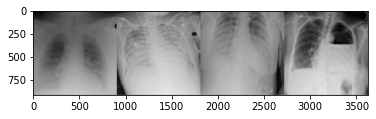

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1],
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])
tensor([[0.0714, 0.0890, 0.5512, 0.1069, 0.1224, 0.1886, 0.5511, 0.0882, 0.0762,
         0.8075, 0.1462],
        [0.1319, 0.0933, 0.2090, 0.0392, 0.0445, 0.1242, 0.4983, 0.1084, 0.1159,
         0.6736, 0.1975],
        [0.0784, 0.0943, 0.5275, 0.0987, 0.1119, 0.1845, 0.5557, 0.0974, 0.0803,
         0.8101, 0.1670],
        [0.1192, 0.0823, 0.1879, 0.0377, 0.0430, 0.1216, 0.4869, 0.1080, 0.1237,
         0.6789, 0.1908]], grad_fn=<SigmoidBackward>)


In [ ]:
# Quick evaluation 

# get some random training images
dataiter = iter(train_data_loader)
sample = dataiter.next()
inputs = sample['image'].float()
label = sample['label'].float()
print(inputs.shape)
batch_predicted_values = Network(inputs)
imshow(torchvision.utils.make_grid(sample['image']))
print(sample['label'])
print(batch_predicted_values)